In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip freeze

argon2-cffi==20.1.0
attrs==20.2.0
backcall==0.2.0
bleach==3.1.5
certifi==2020.6.20
cffi==1.14.2
chardet==3.0.4
colorama==0.4.3
cryptography==3.1
cycler==0.10.0
Cython==0.29.21
decorator==4.4.2
defusedxml==0.6.0
dill==0.3.2
dlx==1.0.4
docplex==2.15.194
entrypoints==0.3
fastdtw==0.3.4
fastjsonschema==2.14.5
h5py==2.10.0
idna==2.10
importlib-metadata==1.7.0
inflection==0.5.1
ipykernel==5.3.4
ipympl==0.5.7
ipython==7.18.1
ipython-genutils==0.2.0
ipywidgets==7.5.1
jedi==0.17.2
Jinja2==2.11.2
joblib==0.16.0
json5==0.9.5
jsonschema==3.2.0
jupyter-client==6.1.7
jupyter-core==4.6.3
jupyterlab==2.2.6
jupyterlab-server==1.2.0
kiwisolver==1.2.0
MarkupSafe==1.1.1
matplotlib==3.3.1
mistune==0.8.4
more-itertools==8.5.0
mpmath==1.1.0
multitasking==0.0.9
nbconvert==5.6.1
nbformat==5.0.7
nest-asyncio==1.4.0
networkx==2.5
nodejs==0.1.1
notebook==6.1.3
npm==0.1.1
ntlm-auth==1.5.0
numpy==1.19.1
optional-django==0.1.0
packaging==20.4
pandas==1.1.1
pandocfilters==1.4.2
parso==0.7.1
pickleshare==0.7.5
Pillow=

In [34]:
# pip install qiskit-terra==0.15.0

In [3]:
# pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [35]:
# pip install -e git+https://github.com/Qiskit/qiskit-terra.git#egg=qiskit-terra

In [3]:
import qiskit as qk

In [4]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

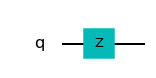

In [5]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')

In [6]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
# plot_bloch_multivector(out) # not working with qiskit-terra==0.15.1 -- should have been fixed in the next version 

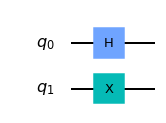

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

In [8]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()

In [9]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

In [10]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

## Create entangled state

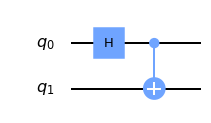

In [11]:
qc = QuantumCircuit(2)

def create_phi0(qc):  
    # Apply H-gate to the first:
    qc.h(0)
    # Apply a CNOT:
    qc.cx(0,1)
    return qc
    
qc = create_phi0(qc)
qc.draw('mpl')

In [12]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Bell state vector = }")

<IPython.core.display.Math object>

## Change coordinates to x-basis

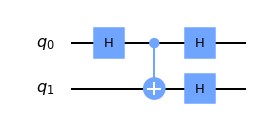

In [13]:
def rotate_x(qc, qubit):
    qc.h(qubit)
    return qc

qc = QuantumCircuit(2)
    
qc = create_phi0(qc)
qc = rotate_x(qc, 0)
qc = rotate_x(qc, 1)
qc.draw('mpl')

In [14]:
phi0_state_x = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(phi0_state_x, pretext="\\text{Bell state vector in x-basis = }")

<IPython.core.display.Math object>

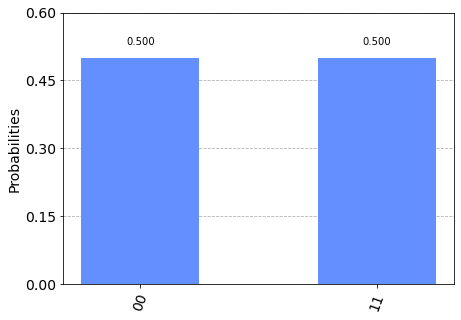

In [15]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

In [16]:
results

{'00': 0.5, '11': 0.5}

## Change coordinates to y-basis

In [17]:
qc = QuantumCircuit(1)

def rotate_y(qc, qubit):
    qc.rz(-pi/2, qubit)
    qc.h(qubit)
    return qc

initial_state = [1, 0]  # Define state |0>
# initial_state = [0, 1]  # Define state |1>
qc.initialize(initial_state, 0)
rotate_y(qc, 0)
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
array_to_latex(out, pretext="\\text{Statevector = }")
# plot_bloch_multivector(out) 



<IPython.core.display.Math object>

In [18]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

## Change coordinates of Bell state to y

In [19]:
qc = QuantumCircuit(2)

qc = create_phi0(qc)
rotate_y(qc, 0)
rotate_y(qc, 1)
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
array_to_latex(out, pretext="\\text{Bell state in y-basis = }")


<IPython.core.display.Math object>

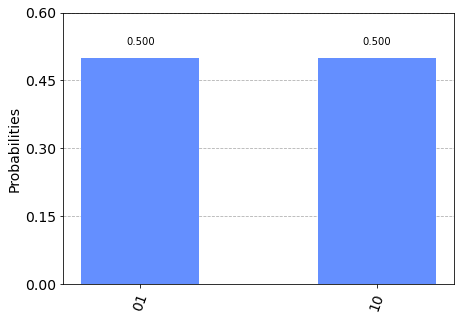

In [20]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

## Density matrix

In [21]:
from qiskit.quantum_info.states import DensityMatrix, Statevector
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
rho = DensityMatrix(np.array([[1, 0], [0, 1]])).evolve(unitary)
array_to_latex(rho.data)

<IPython.core.display.Math object>

## Measure mixed state in z-basis

In [22]:
rho = DensityMatrix(np.array([[1/2, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1/2]]))
array_to_latex(rho.data)


<IPython.core.display.Math object>

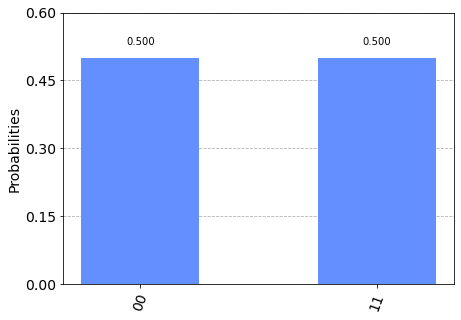

In [23]:
results = rho.probabilities_dict()
plot_histogram(results)

## Measure mixed state in y-basis

In [24]:
qc = QuantumCircuit(2)

rotate_y(qc, 0)
rotate_y(qc, 1)

rho = DensityMatrix(np.array([[1/2, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1/2]])).evolve(Operator(qc))
array_to_latex(rho.data)


<IPython.core.display.Math object>

In [25]:
# Single-shot measurement -> probabilistic outcome
outcome, value = rho.measure()

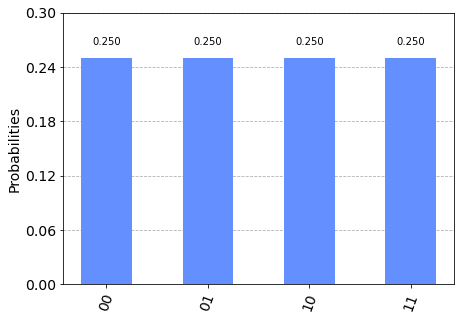

In [26]:
results = rho.probabilities_dict()
plot_histogram(results)

## Measure mixed state in x-basis

In [27]:
qc = QuantumCircuit(2)

rotate_x(qc, 0)
rotate_x(qc, 1)

rho = DensityMatrix(np.array([[1/2, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1/2]])).evolve(Operator(qc))
array_to_latex(rho.data)

<IPython.core.display.Math object>

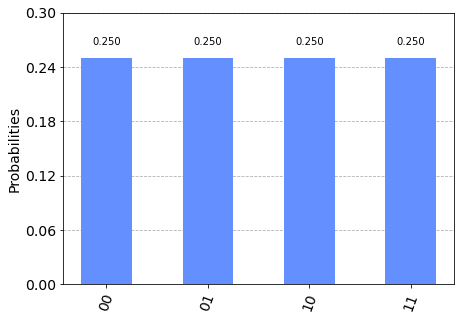

In [28]:
results = rho.probabilities_dict()
plot_histogram(results)

## Plot some cubes

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

## Bell state measured in x, y and z by Alice and Bob

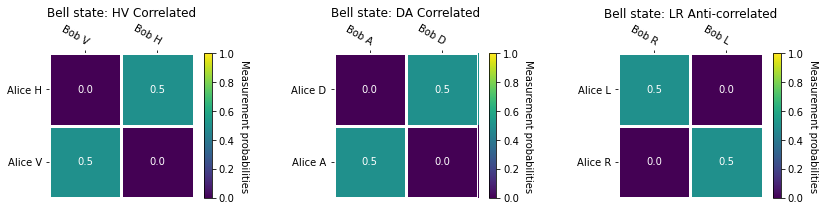

In [30]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12, 3))

outcomes_A_HV = ["Alice H", "Alice V"]
outcomes_B_HV = ["Bob V", "Bob H"]
corr_HV = np.array([[0, 0.5], [0.5, 0]])

outcomes_A_DA = ["Alice D", "Alice A"]
outcomes_B_DA = ["Bob A", "Bob D"]
corr_DA = np.array([[0, 0.5], [0.5, 0]])

outcomes_A_LR = ["Alice L", "Alice R"]
outcomes_B_LR = ["Bob R", "Bob L"]
corr_LR = np.array([[0.5, 0], [0, 0.5]])


ax1.set_title('Bell state: HV Correlated')
im, _ = heatmap(corr_HV, outcomes_A_HV, outcomes_B_HV, ax=ax1,
                    vmin=0, vmax=1,
                    cbarlabel="Measurement probabilities")
texts = annotate_heatmap(im, valfmt="{x:.1f}", threshold=0.5,
                 textcolors=["white", "black"])


ax2.set_title('Bell state: DA Correlated')
im, _ = heatmap(corr_DA, outcomes_A_DA, outcomes_B_DA, ax=ax2,
                    vmin=0, vmax=1,
                    cbarlabel="Measurement probabilities")
texts = annotate_heatmap(im, valfmt="{x:.1f}", threshold=0.5, 
                 textcolors=["white", "black"])


ax3.set_title('Bell state: LR Anti-correlated')
im, _ = heatmap(corr_LR, outcomes_A_LR, outcomes_B_LR, ax=ax3,
                    vmin=0, vmax=1,
                    cbarlabel="Measurement probabilities")
texts = annotate_heatmap(im, valfmt="{x:.1f}", threshold=0.5,
                 textcolors=["white", "black"])

fig.tight_layout()
plt.show()

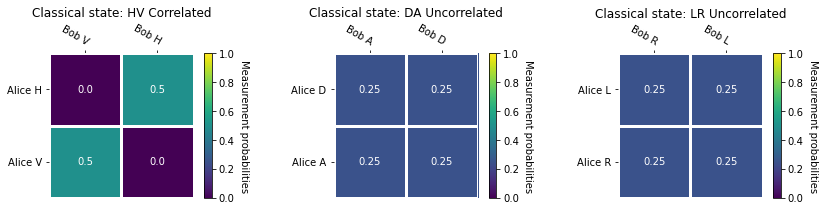

In [31]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12, 3))

outcomes_A_HV = ["Alice H", "Alice V"]
outcomes_B_HV = ["Bob V", "Bob H"]
corr_HV = np.array([[0, 0.5], [0.5, 0]])

outcomes_A_DA = ["Alice D", "Alice A"]
outcomes_B_DA = ["Bob A", "Bob D"]
corr_DA = np.array([[0.25, 0.25], [0.25, 0.25]])

outcomes_A_LR = ["Alice L", "Alice R"]
outcomes_B_LR = ["Bob R", "Bob L"]
corr_LR = np.array([[0.25, 0.25], [0.25, 0.25]])


ax1.set_title('Classical state: HV Correlated')
im, _ = heatmap(corr_HV, outcomes_A_HV, outcomes_B_HV, ax=ax1,
                    vmin=0, vmax=1,
                    cbarlabel="Measurement probabilities")
texts = annotate_heatmap(im, valfmt="{x:.1f}", threshold=0.5,
                 textcolors=["white", "black"])


ax2.set_title('Classical state: DA Uncorrelated')
im, _ = heatmap(corr_DA, outcomes_A_DA, outcomes_B_DA, ax=ax2,
                    vmin=0, vmax=1,
                    cbarlabel="Measurement probabilities")
texts = annotate_heatmap(im, valfmt="{x:.2f}", threshold=0.5, 
                 textcolors=["white", "black"])


ax3.set_title('Classical state: LR Uncorrelated')
im, _ = heatmap(corr_LR, outcomes_A_LR, outcomes_B_LR, ax=ax3,
                    vmin=0, vmax=1,
                    cbarlabel="Measurement probabilities")
texts = annotate_heatmap(im, valfmt="{x:.2f}", threshold=0.5,
                 textcolors=["white", "black"])

fig.tight_layout()
plt.show()

In [32]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")
# plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

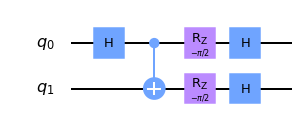

In [33]:
qc = QuantumCircuit(2)
    
qc = create_phi0(qc)
qc = rotate_y(qc, 0)
qc = rotate_y(qc, 1)
qc.draw('mpl')

In [34]:
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector in y-basis = }")
# plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

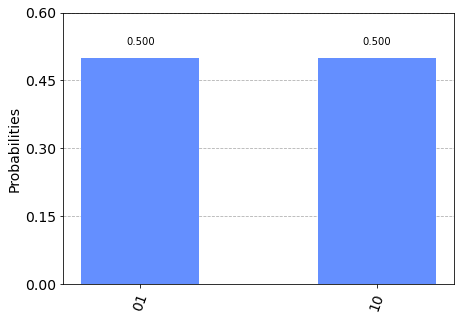

In [64]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

In [65]:
from qiskit.quantum_info.states import DensityMatrix, Statevector
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
rho = DensityMatrix(np.array([[0, 1], [1, 0]])).evolve(unitary)
array_to_latex(rho.data)

<IPython.core.display.Math object>

In [66]:
statepp = 1/2 * (np.array([1, 1, 1, 1])) # |+ + >
statemm = 1/2 * (np.array([1, -1, -1, 1])) # |- - >
staterr = 1/2 * (np.array([1, 1j, 1j, -1])) # |r r >
statell = 1/2 * (np.array([1, -1j, -1j, -1])) # |l l >
psipp = Statevector(statepp)
psimm = Statevector(statemm)
psirr = Statevector(staterr)
psill = Statevector(statell)
rhopp = DensityMatrix(psipp)
rhomm = DensityMatrix(psimm)
rhorr = DensityMatrix(psirr)
rholl = DensityMatrix(psill)
array_to_latex(rhopp.data + rhomm.data - rhorr.data - rholl.data)

<IPython.core.display.Math object>

## States in x-basis

In [67]:
qc = QuantumCircuit(2)

rotate_x(qc, 0)
rotate_x(qc, 1)